In [1]:
# Enable autoloading for utils.py and convert.py
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import utils
import convert

In [28]:
observations = utils.get_nh_observations('charon', 'NH_RED', 'NH_BLUE')
red_counts = np.array([x['NH_RED_counts'] for x in observations])
blue_counts = np.array([x['NH_BLUE_counts'] for x in observations])
ranges = np.array([x['obs_to_target'] for x in observations])

red_err = red_counts * (ranges+12000)**2 - red_counts * ranges**2
blue_err = blue_counts * (ranges+12000)**2 - blue_counts * ranges**2

/home/tim/miniconda3/envs/pluto/lib/python3.7/site-packages/scipy/io/idl.py:414: UserWarning: Skipping SYSTEM_VARIABLE record
  warnings.warn("Skipping SYSTEM_VARIABLE record")


In [29]:
red_counts_norm = red_counts * ranges**2
blue_counts_norm = blue_counts * ranges**2

<ErrorbarContainer object of 3 artists>

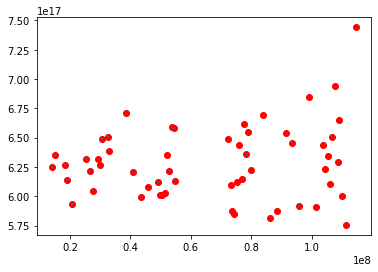

In [34]:
plt.scatter(ranges, red_counts_norm, c='red')
plt.errorbar(ranges, red_counts_norm, yerr=red_err, linestyle="None")

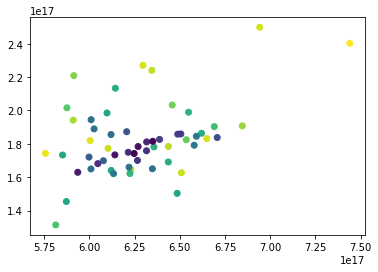

In [5]:
plt.scatter(red_counts_norm, blue_counts_norm, c=ranges)

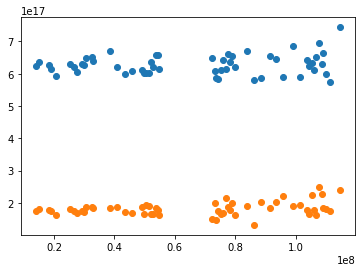

In [11]:
plt.scatter(ranges, red_counts_norm)
plt.scatter(ranges, blue_counts_norm)

In [7]:
upper = []
lower = []
for obs in observations:
    obs_range = obs['obs_to_target']
    red_counts = obs['NH_RED_counts'] * obs_range**2
    blue_counts = obs['NH_BLUE_counts'] * obs_range**2
    if obs_range > 0.6e8:
        upper.append((red_counts, blue_counts, obs_range))
    else:
        lower.append((red_counts, blue_counts, obs_range))
red_upper, blue_upper, range_upper = np.array(list(zip(*upper)))
red_lower, blue_lower, range_lower = np.array(list(zip(*lower)))

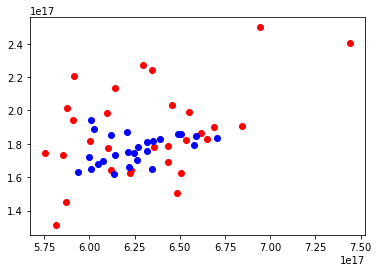

In [8]:
plt.scatter(red_upper, blue_upper, c='red')
plt.scatter(red_lower, blue_lower, c='blue')

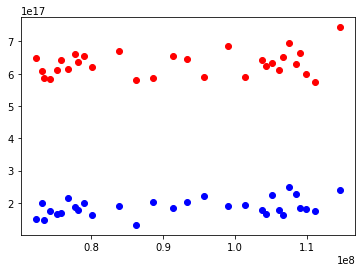

In [9]:
plt.scatter(range_upper, red_upper, c='red')
plt.scatter(range_upper, blue_upper, c='blue')

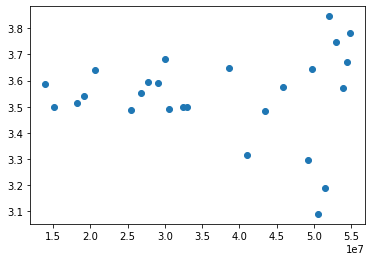

In [10]:
plt.scatter(range_lower, red_lower/blue_lower)